In [69]:
import rebound
import reboundx
import numpy as np
from rebound import InterruptiblePool
%matplotlib inline
import matplotlib.pyplot as plt

def getstr(dt):
    return "{:.0e}".format(dt)
def sim(par):
    run, mp, tau_e, e0, tmax, Nout, damping, integrator = par
    np.random.seed(run)
    theta = 2*np.pi*np.random.rand()
    sim = rebound.Simulation()
    sim.integrator = integrator
    sim.ri_ias15.epsilon = 0.
    sim.dt = 1.e-2
    sim.add(m=1.)
    
    sim.add(m=mp,a=1.,e=e0, theta=theta)
    sim.add(m=mp,a=2.,e=0.2)
    sim.move_to_com() # Moves to the center of momentum frame  
    
    if damping is True:
        rebx = reboundx.Extras(sim)
        rebx.add_modify_orbits_direct()
    
        tau_es = rebx.modify_orbits_direct.tau_e
        tau_es[1] = tau_e    
    
    times = np.logspace(0,np.log10(tmax),Nout)
    e1, e2, a1, a2 = np.zeros(len(times)), np.zeros(len(times)), np.zeros(len(times)), np.zeros(len(times))
    for i,time in enumerate(times):
        sim.integrate(time, exact_finish_time=1)
        o = sim.calculate_orbits()
        a1[i] = o[0].a
        a2[i] = o[1].a
        e1[i] = o[0].e
        e2[i] = o[1].e
        
    sim = rebound.Simulation()
    sim.integrator = "ias15"
    sim.ri_ias15.epsilon = 0.
    sim.dt = 1.e-3
    sim.add(m=1.)
    
    sim.add(m=mp,a=1.,e=e0, theta=theta)
    sim.add(m=mp,a=2.,e=0.2)
    sim.move_to_com() # Moves to the center of momentum frame  
    
    if damping is True:
        rebx = reboundx.Extras(sim)
        rebx.add_modify_orbits_direct()
    
        tau_es = rebx.modify_orbits_direct.tau_e
        tau_es[1] = tau_e    
    
    e1ref, e2ref, a1ref, a2ref = np.zeros(len(times)), np.zeros(len(times)), np.zeros(len(times)), np.zeros(len(times))
    for i,time in enumerate(times):
        sim.integrate(time, exact_finish_time=1)
        o = sim.calculate_orbits()
        a1ref[i] = o[0].a
        a2ref[i] = o[1].a
        e1ref[i] = o[0].e
        e2ref[i] = o[1].e

    a1err = np.fabs(a1-a1ref)/a1ref
    a2err = np.fabs(a2-a2ref)/a2ref
    e1err = np.fabs(e1-e1ref)/e1ref
    e2err = np.fabs(e2-e2ref)/e2ref
    
    return [times, a1, a2, e1, e2, a1err, a2err, e1err, e2err]

In [64]:
mp = 1.e-3
tau_e = -100
e0 = 1.e-1
tmax=1000
Nout=100
damping=True
integrator="whfast"
Nruns=3

params = [(run, mp, tau_e, e0, tmax, Nout, damping, integrator) for run in range(Nruns)]
pool = InterruptiblePool()
res = np.array(pool.map(sim, params))
    
ts = res[:,0,:]
a1 = res[:,1,:]
a2 = res[:,2,:]
e1 = res[:,3,:]
e2 = res[:,4,:]
a1err = res[:,5,:]
a2err = res[:,6,:]
e1err = res[:,7,:]
e2err = res[:,8,:]

import pickle

pickle.dump((Nruns, ts, a1, a2, e1, e2, a1err, a2err, e1err, e2err), open("test.p", "wb"))

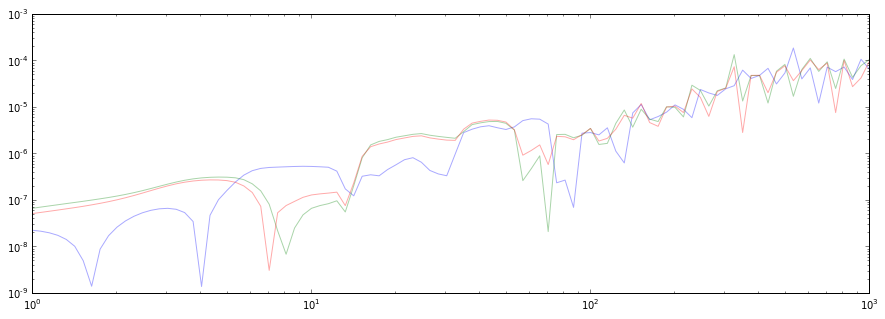

In [65]:
ts, a1, a2, e1, e2, a1err, a2err, e1err, e2err = pickle.load(open("test.p", "rb"))
fig, ax = plt.subplots(figsize=(15,5))
for run in range(Nruns):
    ax.plot(ts[run], e1err[run], alpha=1/Nruns)

ax.set_xscale('log')
ax.set_yscale('log')

In [49]:
ts = res[:,0,:]
print(ts)

[[  1.           3.16227766  10.        ]
 [  1.           3.16227766  10.        ]]


In [51]:
e2 = res[:,4,:]
print(e2)
print(e2[0])

[[ 0.20016573  0.20050715  0.19971045]
 [ 0.20016573  0.20050715  0.19971045]]
[ 0.20016573  0.20050715  0.19971045]


In [12]:
mp = 1.e-3
tau_e = -100
e0 = 1.e-1
tmax=1.e5
Nout=1000
damping=True
integrator="whfast"
times, a1, a2, e1, e2, a1err, a2err, e1err, e2err = sim((1,mp, tau_e, e0, tmax, Nout, damping, integrator))

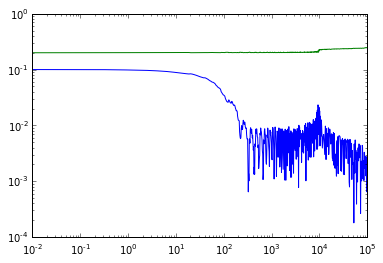

In [27]:
fig, ax = plt.subplots()
ax.plot(times, e1)
ax.plot(times, e2)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim(1e-11,1e0)

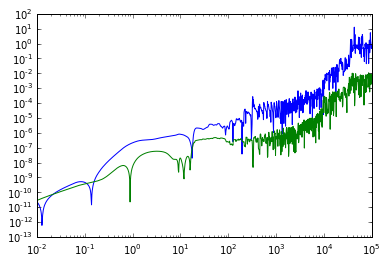

In [30]:
fig, ax = plt.subplots()
ax.plot(times, e1err)
ax.plot(times, e2err)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim(1e-11,1e0)

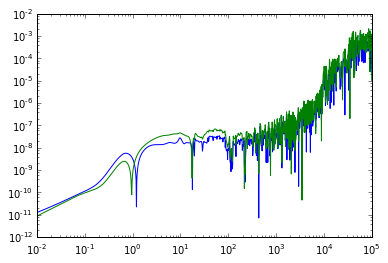

In [28]:
fig, ax = plt.subplots()
ax.plot(times, a1err)
ax.plot(times, a2err)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim(1e-11,1e0)

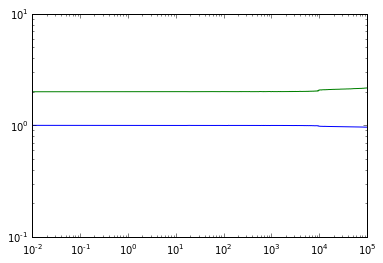

In [29]:
fig, ax = plt.subplots()
ax.plot(times, a1)
ax.plot(times, a2)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim(1e-11,1e0)

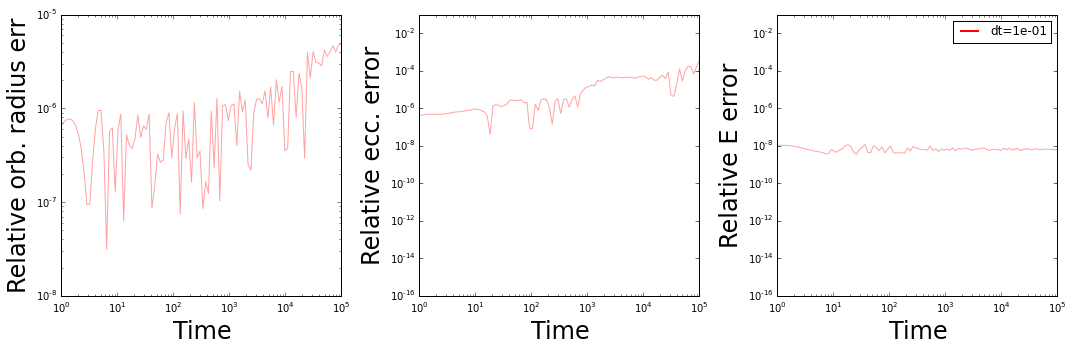

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
Ndts = 1
dts = [0.1] #np.logspace(-Ndts, -1, 2*Ndts)
colors = ['r', 'g', 'b', 'k', 'y', 'c', 'fuchsia', 'gray']
Nruns=2
e0 = 1.e-1
for run in range(Nruns):
    np.random.seed(run)
    e0 = e0 + 1.e-3*e0*np.random.rand()
    for i, dt in enumerate(dts): 
        ploterr(ax1,ax2,ax3,run,mp=1e-3, e0=e0, tau_e=-1.e3, tmax=1e5,dt=dt, damping=True, color=colors[i])

labels = [plt.Line2D((0,1),(0,0), color=c, linestyle='-', linewidth=2) for c in colors]
dtstrs = [getstr(dt) for dt in dts]
ax3.legend(labels, ['dt='+dtstr for dtstr in dtstrs])
ax2.set_ylim([1.e-16, 1.e-1])
ax3.set_ylim([1.e-16, 1.e-1])
plt.tight_layout()